<a href="https://colab.research.google.com/github/konstantin224/Diplom/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B2%D0%B0%D0%BA%D0%B0%D0%BD%D1%81%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset_all.csv', delimiter='	', encoding='utf-8')

In [ ]:
dataset

,Unnamed: 0,message_id,channel_id,message_text,message_type,human_classification
0,0,31976,1421126432,#vacancy #job #sales #NewYork #Philadelphia #...,other,other
1,1,1763,1153633109,ВЕДУЩИЙ СПЕЦИАЛИСТ в BTL-команду Toyota.\n\n К...,other,other
2,2,19619,1181766692,обтравка\n\nНаша фотостудия занимается фотосъё...,vacancy,vacancy
3,3,1208,1113366366,Приветствую\n #вакансия #работа #удаленно\n\nА...,vacancy,vacancy
4,4,1550,1109597805,QA Engineer\nСпециалист по тестированию\n\nИще...,vacancy,vacancy
...,...,...,...,...,...,...
4005,4005,58320,1140500499,#помогу #макеты #макетмэйкер #макет\r\n#сторис...,other,vacancy
4006,4006,255,1726608144,#вакансия #СПб\r\nДиректор по персоналу/HR-Дир...,vacancy,vacancy
4007,4007,10012,1385274097,😎 Backend Developer\r\n\r\nCompany: SQA Group\...,other,other
4008,4008,341,1447304363,🅿️ Резюме\r\nJunior Python Developer\r\n\r\nСм...,resume,other


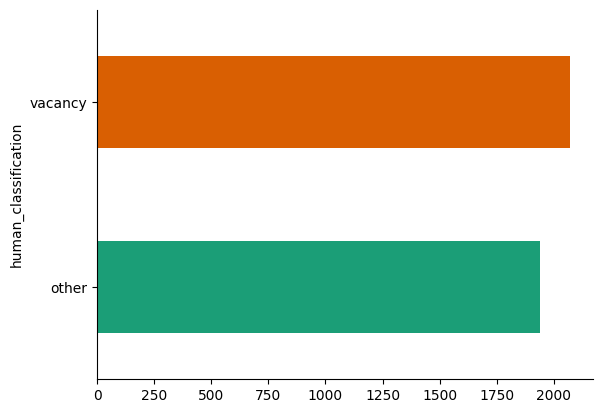

In [ ]:
# @title human_classification

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('human_classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
for i in range(len(dataset)):
  if dataset.human_classification[i]!="vacancy":
    dataset.human_classification[i]="other"

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-13-ef75f0d3d5b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.human_classification[i]="other"
<ipython-input-13-ef75f0d3d5b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.human_classification[i]="other"
<ipython-input-13-ef75f0d3d5b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.human_classification[i]="other"
<ipython

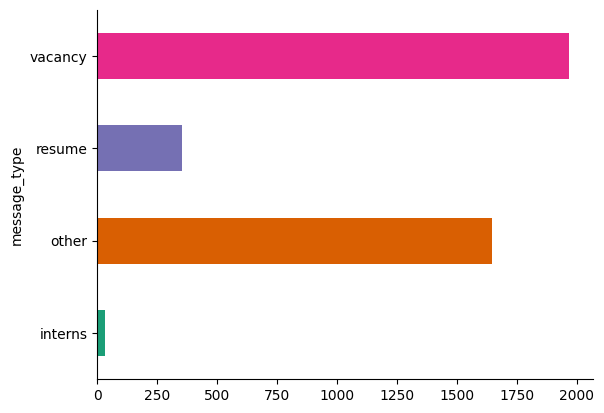

In [ ]:
# @title message_type

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('message_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn import model_selection
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(dataset.message_text, dataset.human_classification,
                                                                                     test_size = 0.3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data)
X_train_counts.shape

(2807, 39491)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape


(3050, 4623)

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])


text_clf_svm = text_clf_svm.fit(train_data, train_labels)
predicted_svm = text_clf_svm.predict(test_data)
np.mean(predicted_svm == test_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.5763324299909666

In [ ]:
test_data


0                                   Опыт работы от 2х лет
1                              English upper-intermediate
2                                Senior QA Engineer (web)
3       - права категории B и минимум три года опыта в...
4       - Опыт в тестировании от 3-х лет (функциональн...
                              ...                        
1102    Здесь ценят гибкость во всем: можно попробоват...
1103    Опыт работы инженером-конструктором и ведущим ...
1104                                                Мидл+
1105       Позиция: Junior+ / Middle Data Scientist (NLP)
1106           - Английский как минимум Intermediate (B1)
Name: sentence, Length: 1107, dtype: object

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
matrix = confusion_matrix(test_labels,predicted_svm)
pr = precision_score(test_labels,predicted_svm, average=None, pos_label = ['trash', 'exp', 'от4', 'отгода', 'от2', 'от5', 'от3', 'безопыта',
       'догода', '6'])
re = recall_score(test_labels,predicted_svm, average=None, pos_label = ['trash', 'exp', 'от4', 'отгода', 'от2', 'от5', 'от3', 'безопыта',
       'догода', '6'])
f = f1_score(test_labels,predicted_svm, average=None, pos_label = ['trash', 'exp', 'от4', 'отгода', 'от2', 'от5', 'от3', 'безопыта',
       'догода', '6'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to ['trash', 'exp', 'от4', 'отгода', 'от2', 'от5', 'от3', 'безопыта', 'догода', '6']) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to ['trash', 'exp', 'от4', 'отгода', 'от2', 'от5', 'от3', 'безопыта', 'догода', '6']) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/d

In [ ]:
f

array([0.        , 0.78039216, 0.80373832, 0.78571429, 0.        ,
       0.61585366, 0.74174757, 0.05714286, 0.81407035, 0.        ])

In [ ]:
train_labels.unique()

array(['trash', 'exp', 'от4', 'отгода', 'от2', 'от5', 'от3', 'безопыта',
       'догода', '6'], dtype=object)

In [ ]:
test_labels.unique()

array(['от2', 'trash', 'от5', 'от3', 'от1', 'догода', 'от4', 'безопыта'],
      dtype=object)

In [ ]:
pr = precision_score(test_labels,svm_1.predict(test_data), average='binary', pos_label="vacancy")
re = recall_score(test_labels,svm_1.predict(test_data), average='binary', pos_label="vacancy")
f = f1_score(test_labels,svm_1.predict(test_data), average='binary', pos_label="vacancy")

In [ ]:
print(pr, re, f)

0.9536741214057508 0.9241486068111455 0.9386792452830189


In [ ]:
train_data.to_csv(f"/content/drive/MyDrive/train_data.csv",sep=',')
train_labels.to_csv(f"/content/drive/MyDrive/train_labels.csv",sep=',')
test_data.to_csv(f"/content/drive/MyDrive/test_data.csv",sep=',')
test_labels.to_csv(f"/content/drive/MyDrive/test_labels.csv",sep=',')

In [ ]:
train_labels

2204        vacancy
1999    not vacancy
3136        vacancy
733     not vacancy
3200    not vacancy
           ...     
2840    not vacancy
1136        vacancy
2414    not vacancy
1372    not vacancy
3292    not vacancy
Name: human_classification, Length: 2807, dtype: object

In [ ]:
svm_1 = text_clf_svm.fit(train_data.head(100), train_labels.head(100))
svm_2 = svm_1.fit(train_data.tail(1403), train_labels.tail(1403))
predicted_svm_2 = text_clf_svm_2.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9351620947630923

In [ ]:
abs(0.9276807980049875-0.9351620947630923)

0.007481296758104827

In [ ]:
len(train_data)

2807

In [ ]:
data_1

,Unnamed: 0,message_id,channel_id,message_dttm,message_text,post_author,from_name,message_user_id,link
303831,303831,4145,1254975956,2021-12-22,NaN,0,NaN,0,https://t.me/budujobs/4145
378382,378382,1541,1391782240,2020-04-28,Волонтером ООН на Кубу\nтолько для россиян!! н...,0,NaN,0,https://t.me/brain_drain_ru/1541
380976,380976,772,1400175014,2020-03-25,#ищу копирайтера для составления текстов для б...,0,NaN,0,https://t.me/textodromo/772
1450716,1450716,1759,1226791258,2021-05-13,Полная занятость\n\n Мы — команда разработки L...,0,NaN,0,https://t.me/it_vac/1759
318740,318740,169,1273589379,2018-08-20,Tech Buro ищет волонтеров для помощи в организ...,0,NaN,0,https://t.me/dreamjob_minsk/169
231375,231375,2524,1141029953,2020-02-03,QA Engineer Lead | https://telegra.ph/QA-Engi...,0.0,NaN,0,https://t.me/Remoteit/2524
134408,134408,2934,1080252879,2019-02-20,​​Специалист службы поддержки | Дзен | удаленк...,0.0,NaN,0,https://t.me/promopoisk/2934
337920,337920,2391,1307300150,2021-04-16,SMM-менеджер в Агентство Dore Group\n \nОбяза...,0.0,NaN,0,https://t.me/remote_ru/2391
1369712,1369712,1944,1141029953,2019-09-27,Front-end developer → data-scientist | https:/...,0.0,NaN,0,https://t.me/Remoteit/1944
828139,828139,633,1329809676,2018-10-25,"(#Одоев) Требуется #дефектолог, \nработающий п...",0.0,NaN,0,https://t.me/rueventjob/633


In [ ]:
test = data_1.message_text

In [ ]:
test

303831                                                   NaN
378382     Волонтером ООН на Кубу\nтолько для россиян!! н...
380976     #ищу копирайтера для составления текстов для б...
1450716    Полная занятость\n\n Мы — команда разработки L...
318740     Tech Buro ищет волонтеров для помощи в организ...
231375     QA Engineer Lead  | https://telegra.ph/QA-Engi...
134408     ​​Специалист службы поддержки | Дзен | удаленк...
337920     SMM-менеджер в Агентство Dore Group\n  \nОбяза...
1369712    Front-end developer → data-scientist | https:/...
828139     (#Одоев) Требуется #дефектолог, \nработающий п...
778183     ​​Вашему вниманию - целая подборка сочных вака...
1085226                                                  NaN
97403      #ищу #резюме #ios #swift #удаленка #remote #iO...
525434                                                   NaN
993012     Press Emblem Campaign (PEC) обновила данные по...
654894     Копирайтер-Переводчик английского и(или) немец...
417545     #junior Accou

In [ ]:
test

378382     Волонтером ООН на Кубу\nтолько для россиян!! н...
380976     #ищу копирайтера для составления текстов для б...
1450716    Полная занятость\n\n Мы — команда разработки L...
318740     Tech Buro ищет волонтеров для помощи в организ...
231375     QA Engineer Lead  | https://telegra.ph/QA-Engi...
134408     ​​Специалист службы поддержки | Дзен | удаленк...
337920     SMM-менеджер в Агентство Dore Group\n  \nОбяза...
1369712    Front-end developer → data-scientist | https:/...
828139     (#Одоев) Требуется #дефектолог, \nработающий п...
778183     ​​Вашему вниманию - целая подборка сочных вака...
97403      #ищу #резюме #ios #swift #удаленка #remote #iO...
993012     Press Emblem Campaign (PEC) обновила данные по...
654894     Копирайтер-Переводчик английского и(или) немец...
417545     #junior Account-manager в PosterOne\n\nЧто дел...
575379     #вакансия #flutter\n\nУровень: #Junior #Middle...
127697     #вакансия #senior #php #fulltime #удаленно #ра...
759316     #предлагаюусл

In [ ]:
predicted_svm = text_clf_svm.predict(test)

In [ ]:
predicted_svm

array(['not vacancy', 'not vacancy', 'vacancy', 'not vacancy',
       'not vacancy', 'vacancy', 'vacancy', 'not vacancy', 'vacancy',
       'not vacancy', 'vacancy', 'not vacancy', 'not vacancy', 'vacancy',
       'vacancy', 'vacancy', 'not vacancy', 'not vacancy', 'not vacancy',
       'vacancy', 'vacancy', 'not vacancy', 'not vacancy', 'not vacancy',
       'vacancy', 'not vacancy', 'not vacancy', 'vacancy', 'not vacancy',
       'not vacancy', 'not vacancy', 'vacancy', 'vacancy', 'not vacancy',
       'vacancy', 'not vacancy', 'vacancy', 'vacancy', 'vacancy',
       'vacancy', 'not vacancy', 'vacancy', 'vacancy'], dtype='<U11')

In [ ]:
df = pd.DataFrame({'text': test, 'clasification': predicted_svm})

In [ ]:
df

,text,clasification
378382,Волонтером ООН на Кубу\nтолько для россиян!! н...,not vacancy
380976,#ищу копирайтера для составления текстов для б...,not vacancy
1450716,Полная занятость\n\n Мы — команда разработки L...,vacancy
318740,Tech Buro ищет волонтеров для помощи в организ...,not vacancy
231375,QA Engineer Lead | https://telegra.ph/QA-Engi...,not vacancy
134408,​​Специалист службы поддержки | Дзен | удаленк...,vacancy
337920,SMM-менеджер в Агентство Dore Group\n \nОбяза...,vacancy
1369712,Front-end developer → data-scientist | https:/...,not vacancy
828139,"(#Одоев) Требуется #дефектолог, \nработающий п...",vacancy
778183,​​Вашему вниманию - целая подборка сочных вака...,not vacancy


In [ ]:
df.to_csv("/content/drive/MyDrive/model_test.csv", sep=',')

In [ ]:
df = pd.DataFrame({'text': test, 'clasification': predicted_svm, "human_clasfication":np.zeros((len(test),))})

In [ ]:
df

,text,clasification,human_clasfication
0,Волонтером ООН на Кубу\nтолько для россиян!! н...,not vacancy,0.0
1,#ищу копирайтера для составления текстов для б...,not vacancy,0.0
2,Полная занятость\n\n Мы — команда разработки L...,vacancy,0.0
3,Tech Buro ищет волонтеров для помощи в организ...,not vacancy,0.0
4,QA Engineer Lead | https://telegra.ph/QA-Engi...,not vacancy,0.0
5,​​Специалист службы поддержки | Дзен | удаленк...,vacancy,0.0
6,SMM-менеджер в Агентство Dore Group\n \nОбяза...,vacancy,0.0
7,Front-end developer → data-scientist | https:/...,not vacancy,0.0
8,"(#Одоев) Требуется #дефектолог, \nработающий п...",vacancy,0.0
9,​​Вашему вниманию - целая подборка сочных вака...,not vacancy,0.0


In [ ]:
for i in range(len(df)):
  print(df.text[i])
  x = int(input())
  if x==1:
    df.human_clasfication[i]="vacancy"
  elif x==0:
    df.human_clasfication[i]="not vacancy"

Волонтером ООН на Кубу
только для россиян!! не упускайте свой шанс!

Организация: UNICEF
Что: Resource Mobilization Specialist
Где:  Гавана #Куба
Когда: с августа
Языки: английский и испанский
Образование: высшее в области экономики, бизнес-администрирования, маркетинга, коммуникаций, фандрайзинга, менеджмента или чего-нибудь похожего
Опыт: 3 года
Условия: контракт на год, ежемесячная стипендия около 2600$, разовая выплата на переезд более 5000$, плюс перелеты, страховка, прививки, виза - за счет ООН
Требования: от 25 лет, российское гражданство
Дедлайн: 5 мая
https://www.unv.org/calls/CUBR000019-6821
0
#ищу копирайтера для составления текстов для ботов и имейл рассылок, а так же для сайтов. 

задача понимать ца, потребности, портрет и боли. уметь писать по разному :) 

желательно знать что такое бот, сайт, эмейл.

напишите в лс со словами "копирайтер бот"

прикрепите текст и опишите что сделали. 

оплата проектная. прайс и полный список раьот тоже прикрепите пожалуйста.

связь - @bbbo

In [ ]:
df

,text,clasification,human_clasfication
0,Волонтером ООН на Кубу\nтолько для россиян!! н...,not vacancy,not vacancy
1,#ищу копирайтера для составления текстов для б...,not vacancy,vacancy
2,Полная занятость\n\n Мы — команда разработки L...,vacancy,vacancy
3,Tech Buro ищет волонтеров для помощи в организ...,not vacancy,not vacancy
4,QA Engineer Lead | https://telegra.ph/QA-Engi...,not vacancy,not vacancy
5,​​Специалист службы поддержки | Дзен | удаленк...,vacancy,vacancy
6,SMM-менеджер в Агентство Dore Group\n \nОбяза...,vacancy,vacancy
7,Front-end developer → data-scientist | https:/...,not vacancy,not vacancy
8,"(#Одоев) Требуется #дефектолог, \nработающий п...",vacancy,not vacancy
9,​​Вашему вниманию - целая подборка сочных вака...,not vacancy,not vacancy


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
matrix = confusion_matrix(df.human_clasfication,df.clasification)
pr = precision_score(df.human_clasfication,df.clasification, average='binary', pos_label="vacancy")
re = recall_score(df.human_clasfication,df.clasification, average='binary', pos_label="vacancy")
f = f1_score(df.human_clasfication,df.clasification, average='binary', pos_label="vacancy")

In [ ]:
df.to_csv("/content/drive/MyDrive/model_test.csv",sep=",")
df_loss = df[df.clasification!=df.human_clasfication]
df_loss.to_csv("/content/drive/MyDrive/model_test_loss.csv",sep=",")

,text,clasification,human_clasfication
0,Волонтером ООН на Кубу\nтолько для россиян!! н...,not vacancy,not vacancy
2,Полная занятость\n\n Мы — команда разработки L...,vacancy,vacancy
3,Tech Buro ищет волонтеров для помощи в организ...,not vacancy,not vacancy
4,QA Engineer Lead | https://telegra.ph/QA-Engi...,not vacancy,not vacancy
5,​​Специалист службы поддержки | Дзен | удаленк...,vacancy,vacancy
6,SMM-менеджер в Агентство Dore Group\n \nОбяза...,vacancy,vacancy
7,Front-end developer → data-scientist | https:/...,not vacancy,not vacancy
9,​​Вашему вниманию - целая подборка сочных вака...,not vacancy,not vacancy
11,Press Emblem Campaign (PEC) обновила данные по...,not vacancy,not vacancy
12,Копирайтер-Переводчик английского и(или) немец...,not vacancy,not vacancy


In [ ]:
text_clf_svm.loss_function_

NameError: ignored

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/vacancy_to_classify.csv", sep=";")

In [ ]:
df = df[df["human_classification"]=="vacancy"]
df.to_csv("/content/drive/MyDrive/vacancy_to_razmetka.csv", sep=";")

In [ ]:
df_1 = df.drop(['message_type_new', "human_classification"], axis = 1)

In [ ]:
df_1.to_csv("/content/drive/MyDrive/vacancy_to_razmetka.csv", sep=",")

In [ ]:
df.message_text = [embed_bert_cls(text, model, tokenizer) for text in df.message_text]

In [ ]:
df_1.drop("Unnamed: 0", axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
predicted_svm = [text_clf_svm.predict(text.reshape(1, -1))[0] for text in df.message_text]

In [ ]:
text_clf_svm.predict(df.message_text[0].reshape(1, -1)

'other'

In [ ]:
len(predicted_svm)

4453

In [ ]:
df["clasification"] = predicted_svm

In [ ]:
df

,message_text,message_type_new,human_classification,clasification
0,"[0.041613948, 0.022205267, 0.051990613, -0.066...",other V:0 R:0 I:0,other,other
1,"[0.0590577, -0.031151079, 0.01927824, -0.04057...",other V:1 R:0 I:0,other,other
2,"[0.09561682, 0.0039166347, -0.013394788, -0.05...",vacancy V:16 R:0 I:0,vacancy,vacancy
3,"[0.06934693, 0.041802347, -0.0030260906, -0.06...",vacancy V:8 R:0 I:0,vacancy,vacancy
4,"[0.0820121, 0.0036587166, -0.024584124, -0.082...",other V:0 R:0 I:0,other,other
...,...,...,...,...
4448,"[0.052944656, 0.0504958, 0.007112381, -0.06887...",vacancy V:4 R:1 I:0,vacancy,other
4449,"[0.14611454, 0.04280712, -0.012121474, -0.1089...",vacancy V:6 R:0 I:0,vacancy,vacancy
4450,"[0.022971932, 0.0139853405, 0.019037837, -0.11...",other lang,other,other
4451,"[0.060133383, 0.013574863, 0.03994817, -0.0838...",other small text,other,other


In [ ]:
for i in range(len(df)):
  if df.human_classification[i] !="vacancy":
    df.human_classification[i]= "other"


In [ ]:
for i in range(len(df)):
  if df.clasification[i] !="vacancy":
    df.clasification[i]= "other"


,message_text,message_type_new,human_classification,clasification
0,"[0.041613948, 0.022205267, 0.051990613, -0.066...",other V:0 R:0 I:0,other,other
1,"[0.0590577, -0.031151079, 0.01927824, -0.04057...",other V:1 R:0 I:0,other,other
2,"[0.09561682, 0.0039166347, -0.013394788, -0.05...",vacancy V:16 R:0 I:0,vacancy,vacancy
3,"[0.06934693, 0.041802347, -0.0030260906, -0.06...",vacancy V:8 R:0 I:0,vacancy,vacancy
4,"[0.0820121, 0.0036587166, -0.024584124, -0.082...",other V:0 R:0 I:0,other,other
...,...,...,...,...
4448,"[0.052944656, 0.0504958, 0.007112381, -0.06887...",vacancy V:4 R:1 I:0,vacancy,other
4449,"[0.14611454, 0.04280712, -0.012121474, -0.1089...",vacancy V:6 R:0 I:0,vacancy,vacancy
4450,"[0.022971932, 0.0139853405, 0.019037837, -0.11...",other lang,other,other
4451,"[0.060133383, 0.013574863, 0.03994817, -0.0838...",other small text,other,other


In [ ]:
import numpy as np
from sklearn.metrics import precision_score

In [ ]:
df.clasification = [text for text in df.clasification]

In [ ]:
list(df.clasification)

['other',
 'other',
 'vacancy',
 'vacancy',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'vacancy',
 'other',
 'vacancy',
 'other',
 'other',
 'other',
 'vacancy',
 'vacancy',
 'vacancy',
 'vacancy',
 'other',
 'other',
 'other',
 'other',
 'other',
 'vacancy',
 'other',
 'other',
 'other',
 'vacancy',
 'other',
 'other',
 'vacancy',
 'vacancy',
 'other',
 'other',
 'other',
 'vacancy',
 'other',
 'vacancy',
 'other',
 'other',
 'other',
 'other',
 'vacancy',
 'vacancy',
 'vacancy',
 'other',
 'vacancy',
 'vacancy',
 'vacancy',
 'other',
 'vacancy',
 'vacancy',
 array(['resume'], dtype='<U10'),
 'other',
 'vacancy',
 'other',
 'other',
 'other',
 'other',
 'other',
 'vacancy',
 'vacancy',
 'vacancy',
 'vacancy',
 'other',
 'other',
 'vacancy',
 'vacancy',
 'other',
 'other',
 'vacancy',
 'vacancy',
 'vacancy',
 'other',
 'other',
 'other',
 'vacancy',
 'vacancy',
 'vacancy',
 'other',
 'vacancy',
 'vacancy',
 'other',
 '

In [ ]:
precision_score(df.human_classification, df.clasification, average="binary",pos_label="vacancy")

0.8700564971751412

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
matrix = confusion_matrix(df.human_classification, df.clasification)
pr = precision_score(df.human_classification, df.clasification, average='binary', pos_label="vacancy")
re = recall_score(df.human_classification, df.clasification, average='binary', pos_label="vacancy")
f = f1_score(df.human_classification, df.clasification, average='binary', pos_label="vacancy")

In [ ]:
matrix

array([[1852,  322],
       [ 123, 2156]])

In [ ]:
pr

0.8700564971751412

In [ ]:
re

0.9460289600702062

In [ ]:
f

0.9064536472566742

In [ ]:
df

,Unnamed: 0,message_id,channel_id,message_dttm,message_text,post_author,from_name,message_user_id,link
2,2,3,1000735083,2015-10-19,С понедельника - в новую жизнь! Мы подготовили...,0,NaN,0,https://t.me/distantsiya/3
3,3,4,1000735083,2015-10-22,"Мы начинаем публикацию цикла материалов, посвя...",0,NaN,0,https://t.me/distantsiya/4
4,4,5,1000735083,2015-11-16,Начинаем серию редакторских статей о жизни в А...,0,NaN,0,https://t.me/distantsiya/5
5,5,6,1000735083,2015-12-15,33 ресурса для уважающего себя пиарщика - в за...,0,NaN,0,https://t.me/distantsiya/6
6,6,7,1000735083,2016-01-22,"Продолжаем тему о #LinkedIn!\nДля тех, кто осв...",0,NaN,0,https://t.me/distantsiya/7
...,...,...,...,...,...,...,...,...,...
1593947,1593947,132,1788647101,2023-01-18,Разрабочики в Exness \n🇨🇾Релокация на Кипр. Ex...,0,NaN,0,https://t.me/young_relocate/132
1593948,1593948,133,1788647101,2023-01-19,#дайджест #аналитика #manager \n🔗 Менеджерам и...,0,NaN,0,https://t.me/young_relocate/133
1593949,1593949,134,1788647101,2023-01-20,"#motion #uxdesign\nМоушн, графические и дизайн...",0,NaN,0,https://t.me/young_relocate/134
1593950,1593950,135,1788647101,2023-01-23,"#дайджест #devops #android #ios \nИнженерам, D...",0,NaN,0,https://t.me/young_relocate/135


In [ ]:
df = df.sample(n=10000)

In [ ]:
predicted_svm = text_clf_svm.predict(df.message_text)

In [ ]:
df = [embed_bert_cls(text, model, tokenizer) for text in train_data]

In [ ]:
df.drop(["message_id","Unnamed:0, channel_id"], axis=1)

KeyError: ignored

In [ ]:
df["classification"] = predicted_svm

In [ ]:
df

,Unnamed: 0,message_id,channel_id,message_dttm,message_text,post_author,from_name,message_user_id,link,classification
321326,321326,650,1274092398,2018-11-24,#менеджер проектов в Focus Group\n\nЧто делать...,0.0,NaN,0,https://t.me/dddwork/650,vacancy
626881,626881,309,1099081585,2017-10-23,"Все, что вы хотели знать о MBA, но боялись спр...",0.0,NaN,0,https://t.me/yourcareer/309,not vacancy
332527,332527,1386,1288632775,2021-01-20,Копирайтер \nКто составит план прогрева аудито...,0,NaN,0,https://t.me/Copy_Digital/1386,not vacancy
969226,969226,148,1788647101,2023-02-02,#дайджест #hr #manager #hr\n🔗Менеджерам\n\nMid...,0,NaN,0,https://t.me/young_relocate/148,not vacancy
1400799,1400799,13953,1153633109,2021-09-29,3D ДИЗАЙНЕР-ВИЗУАЛИЗАТОР для проекта на авто т...,0.0,NaN,0,https://t.me/vdhl_good/13953,not vacancy
...,...,...,...,...,...,...,...,...,...,...
704560,704560,4633,1137236002,2022-08-09,Competence Analyst\nв Kwikwins — это платформа...,0.0,NaN,0,https://t.me/foranalysts/4633,not vacancy
1547819,1547819,6535,1400814782,2022-11-18,Менеджер по закупке рекламы в Телеграме в LEVI...,0.0,NaN,0,https://t.me/noexperience/6535,vacancy
154295,154295,4503,1101692370,2022-04-11,🖥 Вакансия — Удалённая\n\n🕹 Должность\n\nМарк...,0.0,NaN,0,https://t.me/dnative_job/4503,vacancy
1417843,1417843,4418,1181766692,2019-06-22,Прямо сейчас нужна 20-минутная сессия Вопрос-о...,0,NaN,0,https://t.me/flruvacancy/4418,not vacancy


In [ ]:
df[["message_text", "classification"]].to_csv('/content/drive/MyDrive/vacancy_to_classify1.csv', index=None, sep=';', encoding='utf-8')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/vacancy_to_classify2.csv",sep=";")

In [ ]:
for i in range(len(df)):
  x = df.message_type_new
  if x[i]!= "vacancy":
    x[i]= "not vacancy"


In [ ]:
df1 = df[df.message_type_new==df.classification]

In [ ]:
len(df[df.classification=="vacancy"])

4925

In [ ]:
df.to_csv("/content/drive/MyDrive/vacancy_to_classify5.csv",sep=";")
df1.to_csv("/content/drive/MyDrive/vacancy_to_classify6.csv",sep=";")

In [ ]:
df1

,message_text,message_type_new,classification
0,#менеджер проектов в Focus Group\n\nЧто делать...,vacancy,vacancy
1,"Все, что вы хотели знать о MBA, но боялись спр...",not vacancy,not vacancy
4,3D ДИЗАЙНЕР-ВИЗУАЛИЗАТОР для проекта на авто т...,not vacancy,not vacancy
5,#продажи #СПб\n\nРуководитель коммерческого от...,not vacancy,not vacancy
6,#вакансия #москва #полныйдень #маркетинг \n\n...,not vacancy,not vacancy
...,...,...,...
9992,👔 Senior Data Scientist\n⛳️ Unikoom ...,not vacancy,not vacancy
9994,#команданааутсорс #front #back #AI #аутсорс\nо...,vacancy,vacancy
9996,Менеджер по закупке рекламы в Телеграме в LEVI...,vacancy,vacancy
9997,🖥 Вакансия — Удалённая\n\n🕹 Должность\n\nМарк...,vacancy,vacancy


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/vacancy_to_classify.csv", sep=";")

In [ ]:
df

,message_text,message_type_new,human_classification
0,Японский мобильный разработчик GREE отчитался ...,other V:0 R:0 I:0,other
1,"Чем заняться, если ты журналист печатки, котор...",other V:1 R:0 I:0,other
2,#Вакансия #Ростов-на-Дону #Fullstack #PHP #Lar...,vacancy V:16 R:0 I:0,vacancy
3,3D Моушн-дизайнер \n\nПривет! На связи AdQuant...,vacancy V:8 R:0 I:0,vacancy
4,А у нас питання від підписниці Катерини: «Коли...,other V:0 R:0 I:0,other
...,...,...,...
4448,#помогу #макеты #макетмэйкер #макет\n#сторисме...,vacancy V:4 R:1 I:0,vacancy
4449,#вакансия #СПб\nДиректор по персоналу/HR-Дирек...,vacancy V:6 R:0 I:0,vacancy
4450,😎 Backend Developer\n\nCompany: SQA Group\nLoc...,other lang,other
4451,🅿️ Резюме\nJunior Python Developer\n\nСмотреть...,other small text,other


In [ ]:
for i in range(len(df)):
  x = df.message_type_new
  if x[i]!="vacancy":
    x[i]="not vacancy"

In [ ]:
df

,message_text,message_type_new,human_classification
0,Японский мобильный разработчик GREE отчитался ...,not vacancy,not vacancy
1,"Чем заняться, если ты журналист печатки, котор...",not vacancy,not vacancy
2,#Вакансия #Ростов-на-Дону #Fullstack #PHP #Lar...,vacancy,vacancy
3,3D Моушн-дизайнер \n\nПривет! На связи AdQuant...,vacancy,vacancy
4,А у нас питання від підписниці Катерини: «Коли...,not vacancy,not vacancy
...,...,...,...
4448,#помогу #макеты #макетмэйкер #макет\n#сторисме...,vacancy,vacancy
4449,#вакансия #СПб\nДиректор по персоналу/HR-Дирек...,vacancy,vacancy
4450,😎 Backend Developer\n\nCompany: SQA Group\nLoc...,not vacancy,not vacancy
4451,🅿️ Резюме\nJunior Python Developer\n\nСмотреть...,not vacancy,not vacancy


In [ ]:
y_pred = text_clf_svm.predict(df.message_text)

In [ ]:
df["classification"] = y_pred

In [ ]:
df

,message_text,message_type_new,human_classification,classification
0,Японский мобильный разработчик GREE отчитался ...,not vacancy,not vacancy,not vacancy
1,"Чем заняться, если ты журналист печатки, котор...",not vacancy,not vacancy,not vacancy
2,#Вакансия #Ростов-на-Дону #Fullstack #PHP #Lar...,vacancy,vacancy,vacancy
3,3D Моушн-дизайнер \n\nПривет! На связи AdQuant...,vacancy,vacancy,vacancy
4,А у нас питання від підписниці Катерини: «Коли...,not vacancy,not vacancy,not vacancy
...,...,...,...,...
4448,#помогу #макеты #макетмэйкер #макет\n#сторисме...,vacancy,vacancy,not vacancy
4449,#вакансия #СПб\nДиректор по персоналу/HR-Дирек...,vacancy,vacancy,vacancy
4450,😎 Backend Developer\n\nCompany: SQA Group\nLoc...,not vacancy,not vacancy,not vacancy
4451,🅿️ Резюме\nJunior Python Developer\n\nСмотреть...,not vacancy,not vacancy,not vacancy


In [ ]:
df["finally1"] = np.zeros((len(df),1))
for i in range(len(df)):
  x = df.message_type_new
  y = df.classification
  z = df.finally1
  if x[i]!=y[i]:
    z[i] = x[i]
  elif x[i]==y[i]:
    z[i] = x[i]


AttributeError: ignored

In [ ]:
df[['message_text',	'message_type_new',	'human_classification',	'classification']].to_csv("/content/drive/MyDrive/vacancy_to_classify7.csv",sep=";")

In [ ]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load("/content/drive/MyDrive/vacancy_model.pkl")

NameError: ignored